<font size=7>Latency Histogram

# Code from Before

In [1]:
import pickle
from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, plot_latency_dist_hist, plot_latency_angle_hist, \
                                 plot_cross_sttc_pairs, plot_vector_layout2, plot_vector_layout5, plot_vector_layout1, read_autocurated_data, plot_pair_analysis
from human_hip.spike_data import plot_raster
from human_hip.animate import animate_latencies

from scipy import stats
from ipywidgets import interact_manual, interact
import matplotlib.pyplot as plt
import numpy as np
from human_hip.spike_data import latencies

from human_hip.spike_data import curate_latencies, plot_raster_latency_pairs, plot_vector_layout, cross_sttc, plot_pair_analysis, plot_cross_sttc_pairs
import pickle
import matplotlib.pyplot as plt
from ipywidgets import interact_manual
import numpy as np
import pickle


In [2]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [3]:
# load good_pairs.pkl
latency_ms = 30
with open("latencies/t_test_try30_try3/hc112823_acid_good_pairs.pkl", "rb") as filename:
    good_pairs = pickle.load(filename)
good_pairs2 = np.array(good_pairs)


In [4]:
print(len(good_pairs),"good pairs")
mean_latencies = []
for pair in good_pairs:
    mean_latency = np.mean( latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms)  )
    mean_latencies.append(mean_latency)
print("all final pairs positive?:", np.all( np.array(mean_latencies)>0 ))

784 good pairs
all final pairs positive?: True


In [5]:
from ipywidgets import interact_manual, interact
from scipy import stats

def pairs_hisogram(good_pairs, sd, ms_cutoff_high=latency_ms ):
    @interact
    def plot_pair(pair_i = (0, len(good_pairs)-1) ):
        latencies_pair = latencies( good_pairs[pair_i][0], good_pairs[pair_i][1], sd, ms_cutoff_high=ms_cutoff_high )
        plt.xlim(-ms_cutoff_high, ms_cutoff_high)
        plt.hist(latencies_pair, bins=12)
        print("Pair: ", good_pairs[pair_i][0],good_pairs[pair_i][1] )
        print("Latency Mean:\t", np.mean(latencies_pair ) )
        print("Num Latencies:\t", len(latencies_pair) )

        t_stat, p_value = stats.ttest_1samp( latencies_pair, 0)
        one_sided_p_value = p_value / 2 if t_stat > 0 else 1 - p_value / 2
        print("T-Test 1-Side:\t", one_sided_p_value )  #print("T-Test: ", stats.ttest_1samp(latencies_pair, 0)[1] )
        
pairs_hisogram( good_pairs, sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=391, description='pair_i', max=783), Output()), _dom_classes=('widget-in…

# Find best pairs

In [6]:
best_pairs = []
for pair in good_pairs:
    latencies_pair = latencies( pair[0], pair[1], sd, ms_cutoff_high=latency_ms )
    if np.mean(latencies_pair) > 4:
        if len(latencies_pair) > 150:
            best_pairs.append(pair)


In [7]:
len(best_pairs)

6

In [9]:
pairs_hisogram( best_pairs, sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=2, description='pair_i', max=5), Output()), _dom_classes=('widget-intera…

<font color="green"> Best Pairs: [ [38,4], [75,4], [10,93], [187,21] , [75,4] [58, 62], [147,90], [107,135], [107,62] ]

In [7]:
pairs_hisogram(  [ [38,4], [75,4], [10,93], [187,21] , [75,4], [58, 62], [147,90], [107,135], [107,62] ], sd, ms_cutoff_high=latency_ms)

interactive(children=(IntSlider(value=4, description='pair_i', max=8), Output()), _dom_classes=('widget-intera…

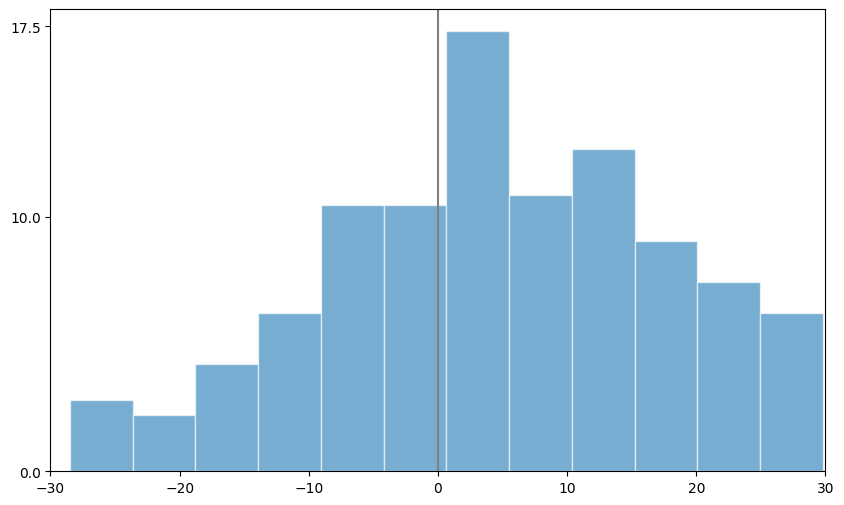

In [28]:
latencies_pair = latencies( 147, 90,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=12)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

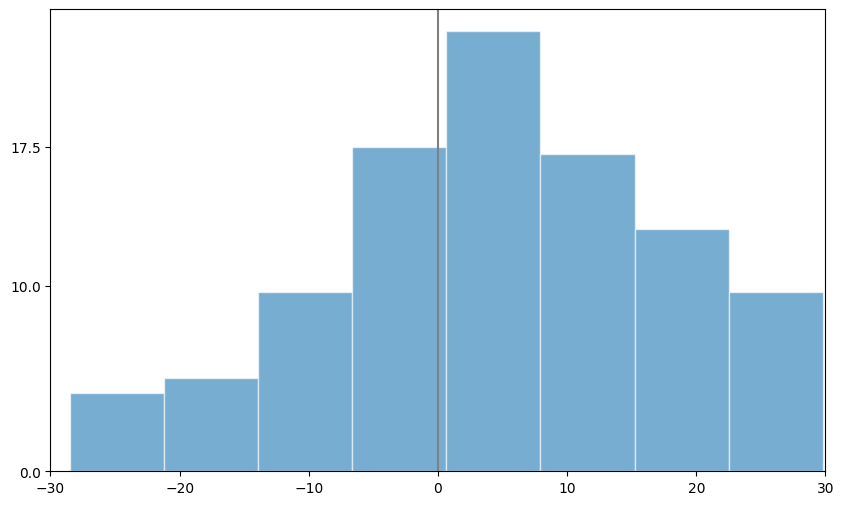

In [8]:
latencies_pair = latencies( 147, 90,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=8)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

# <font color="brown"> Check other electrodes

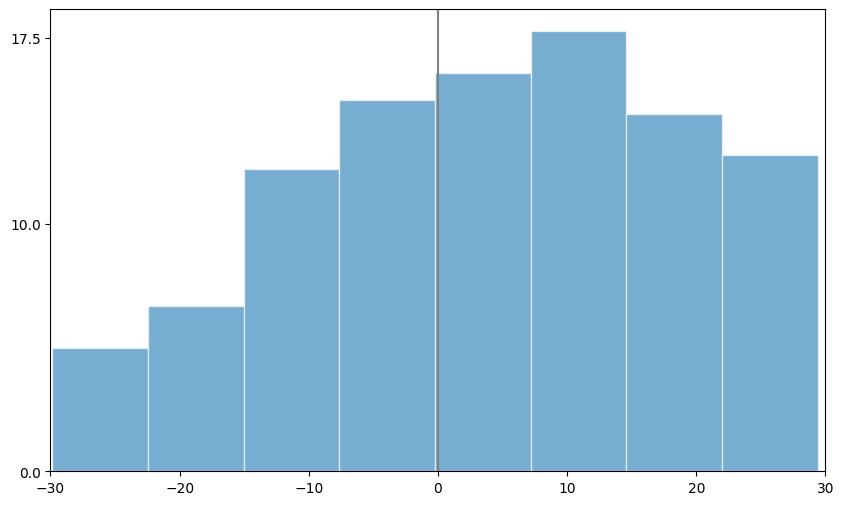

In [9]:
latencies_pair = latencies( 107, 62,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=8)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

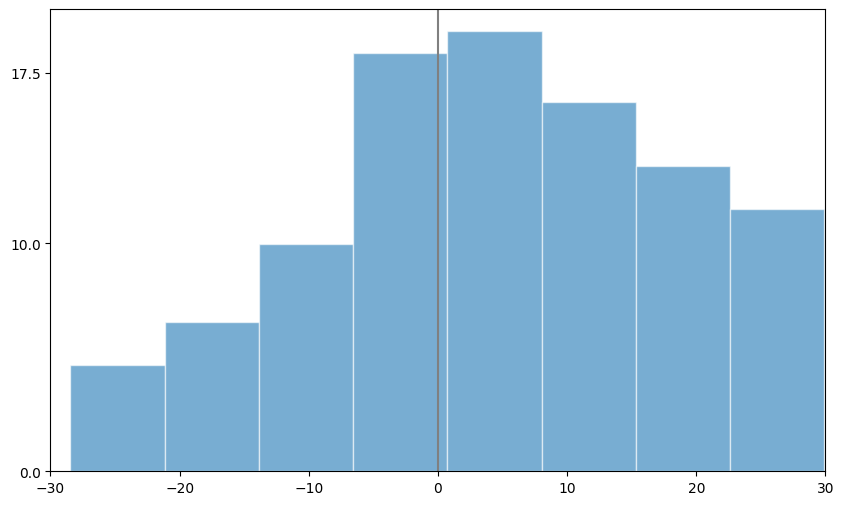

In [15]:
latencies_pair = latencies( 107, 135,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=8)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

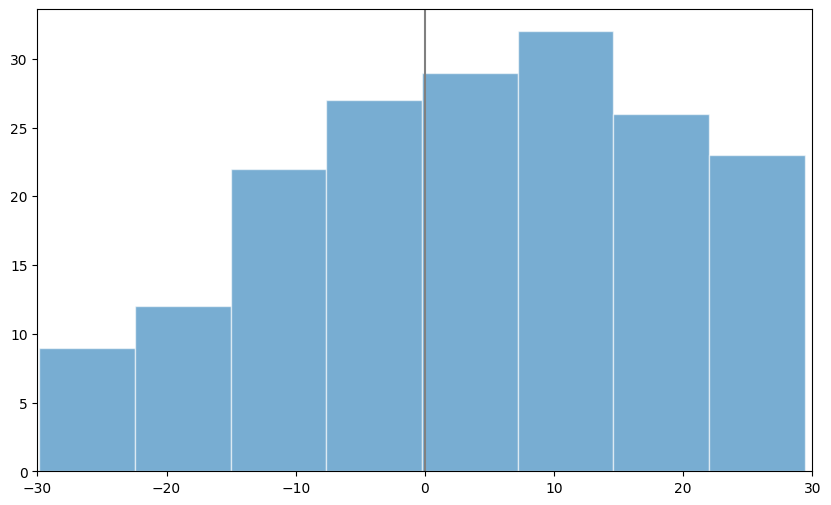

In [20]:
latencies_pair = latencies( 107, 62,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
#counts, bins = np.histogram(latencies_pair, bins=8)



# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
#percentages = counts / counts.sum() * 100
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')
plt.hist(latencies_pair, 8, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

#plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

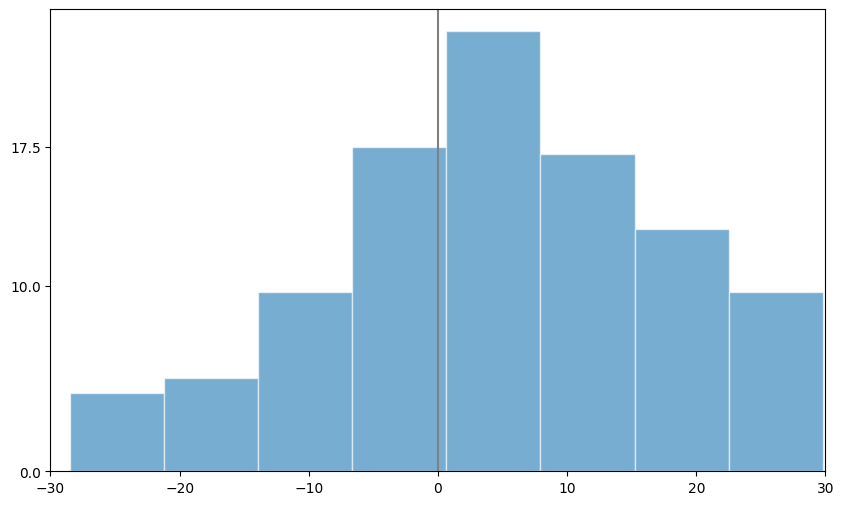

In [22]:
latencies_pair = latencies( 147, 90,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
counts, bins = np.histogram(latencies_pair, bins=8)

percentages = counts / counts.sum() * 100

# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

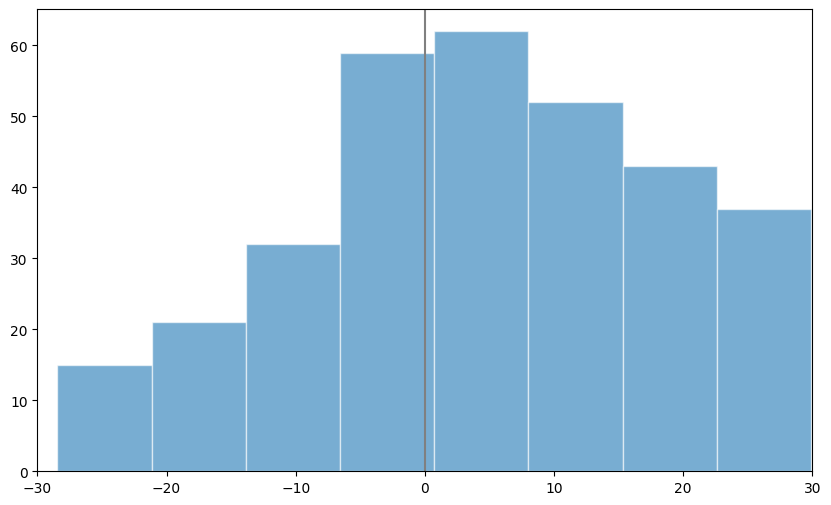

In [21]:
latencies_pair = latencies( 107, 135,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
#counts, bins = np.histogram(latencies_pair, bins=8)



# Plot the histogram with percentages
plt.figure(figsize=(10, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
#percentages = counts / counts.sum() * 100
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')
plt.hist(latencies_pair, 8, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

#plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

In [31]:
latencies_pair = latencies( 147, 90,sd, ms_cutoff_high=latency_ms  )
print( np.mean( latencies_pair ) )
t_stat, p_value = stats.ttest_1samp( latencies_pair, 0)
print( p_value )

4.6582494969804555
3.373878290889633e-14


In [163]:
np.mean(latencies_pair)

4.6582494969804555

# <font color="brown"> Make Footprint plot

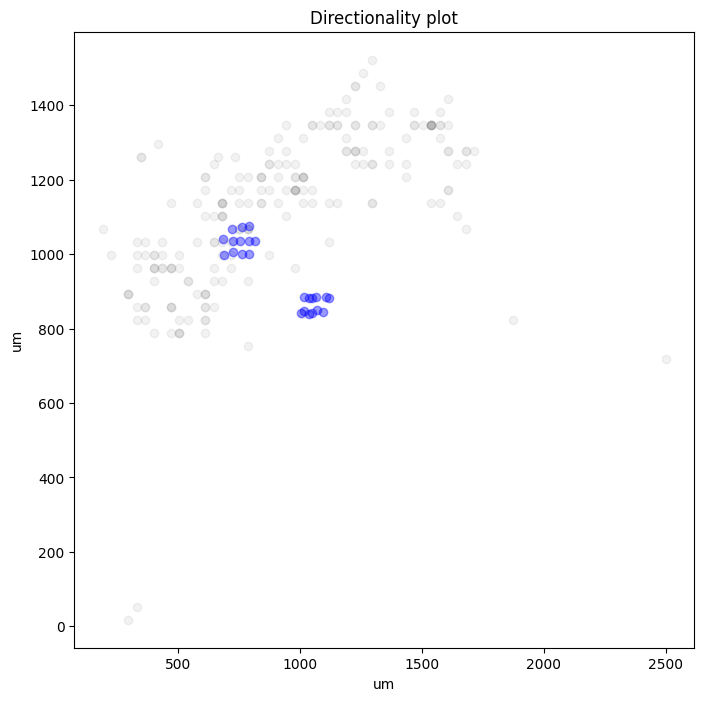

Number of Latencies 210
Mean Latency 1.505
Median Latency 2.125
STTC 0.20723049642599842
Diptest P-val 0.367
Latency Probability 0.82
.
Sender Neuron 107
Sender   Firing Rate 3.469
.
Receiver Neuron 135
Receiver Firing Rate 1.089


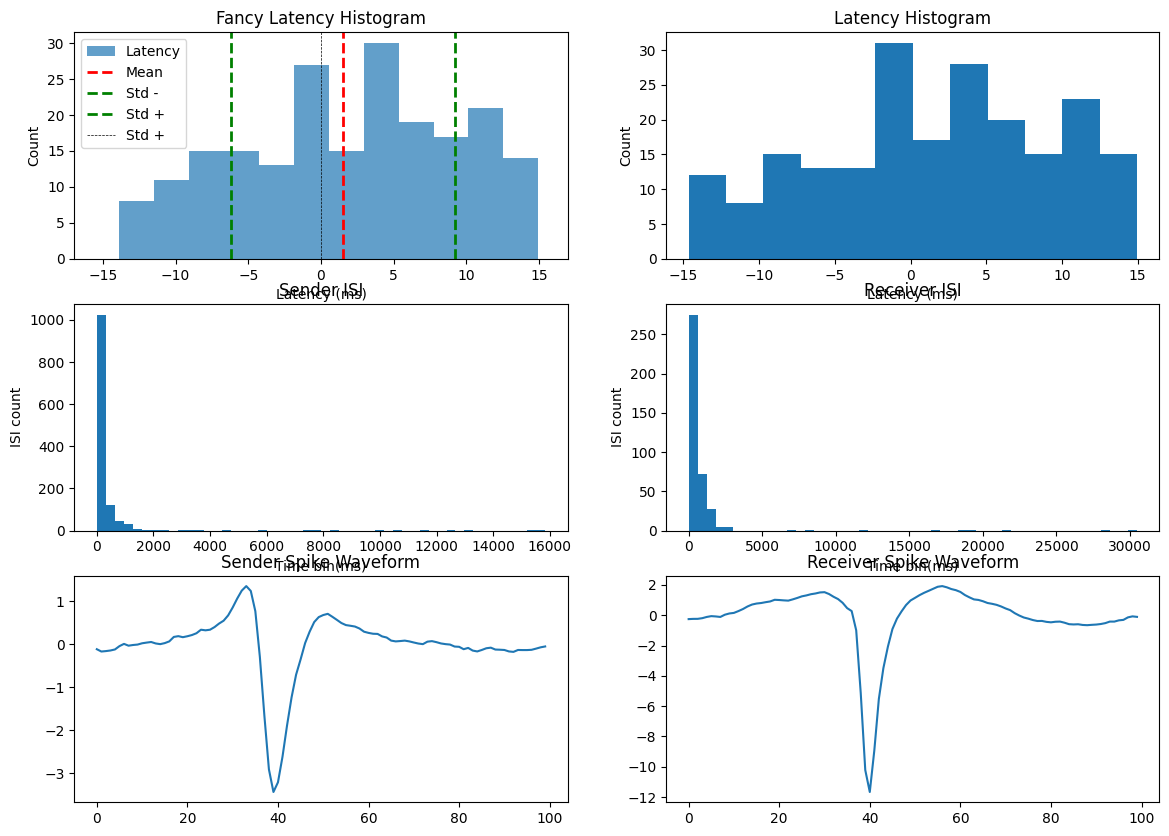

In [11]:
plot_pair_analysis(107,135, sd)

/tmp/ipykernel_5314/3822004766.py:13: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  data = sd.neuron_data[0][107]
/tmp/ipykernel_5314/3822004766.py:21: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  data = sd.neuron_data[0][135]


Text(0.5, 1.0, 'Neuron & Electrode Layout')

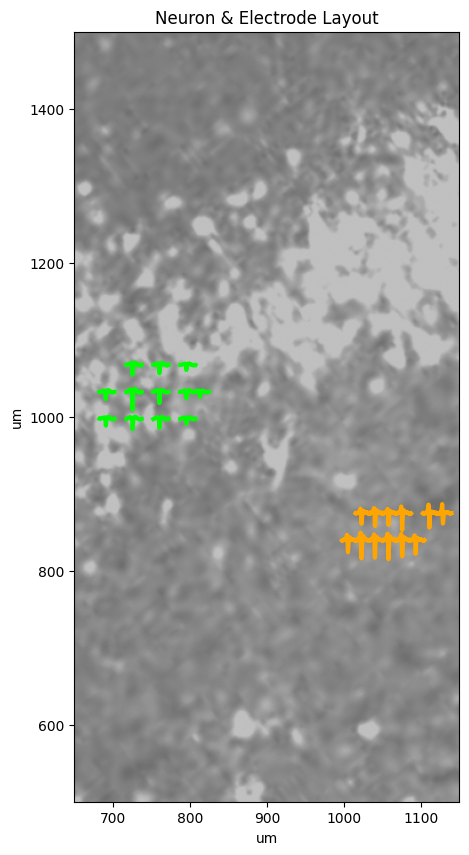

In [3]:
plt.figure(figsize=(15,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# #for num in [4,16, 3,5,16,29, 33,36,37,38, 44, 47, 58, 93, 94, 98]:
# data = sd.neuron_data[0][109]
# temp_chs=list(data["neighbor_channels"])
# xy =data["neighbor_positions"]
# templates=data["neighbor_templates"]
# for i in range(len(temp_chs)):
#     plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*1.8 +xy[i,1], linewidth=1.8, color="orange"  )
    
data = sd.neuron_data[0][107]
temp_chs=list(data["neighbor_channels"])
xy =data["neighbor_positions"]
templates=data["neighbor_templates"]
for i in range(len(temp_chs)):
    plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*7 +xy[i,1], linewidth=3, color="orange"  )


data = sd.neuron_data[0][135]
temp_chs=list(data["neighbor_channels"])
xy =data["neighbor_positions"]
templates=data["neighbor_templates"]
for i in range(len(temp_chs)):
    plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*2 +xy[i,1], linewidth=3, color="lime"  )


#plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
#plt.ylim( 0, 1750 )
plt.xlim( 650, 1150 )                                       # Set axis limits to that of the MEA
plt.ylim( 500, 1500 )

plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout") 

Text(0.5, 1.0, 'Neuron & Electrode Layout')

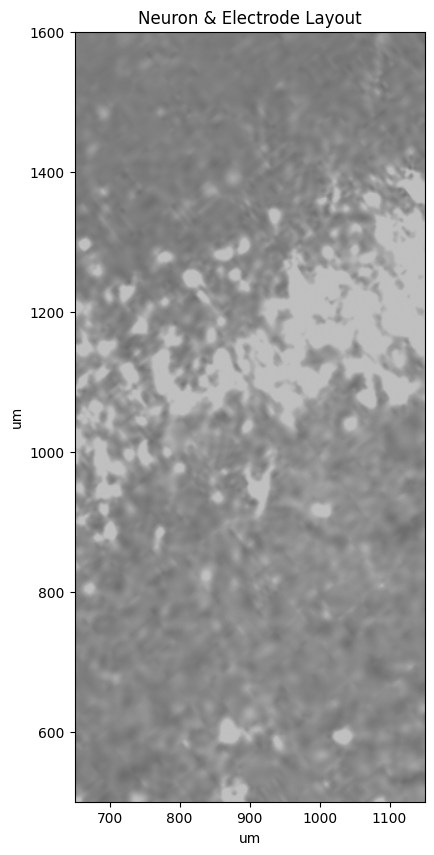

In [5]:
plt.figure(figsize=(15,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823_bw_old.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# #for num in [4,16, 3,5,16,29, 33,36,37,38, 44, 47, 58, 93, 94, 98]:
# data = sd.neuron_data[0][109]
# temp_chs=list(data["neighbor_channels"])
# xy =data["neighbor_positions"]
# templates=data["neighbor_templates"]
# for i in range(len(temp_chs)):
#     plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*1.8 +xy[i,1], linewidth=1.8, color="orange"  )
    
# data = sd.neuron_data[0][107]
# temp_chs=list(data["neighbor_channels"])
# xy =data["neighbor_positions"]
# templates=data["neighbor_templates"]
# for i in range(len(temp_chs)):
#     plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*7 +xy[i,1], linewidth=3, color="orange"  )


# data = sd.neuron_data[0][135]
# temp_chs=list(data["neighbor_channels"])
# xy =data["neighbor_positions"]
# templates=data["neighbor_templates"]
# for i in range(len(temp_chs)):
#     plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*2 +xy[i,1], linewidth=3, color="lime"  )


#plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
#plt.ylim( 0, 1750 )
plt.xlim( 650, 1150 )                                       # Set axis limits to that of the MEA
plt.ylim( 500, 1600 )

plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout") 

Text(0.5, 1.0, 'Neuron & Electrode Layout')

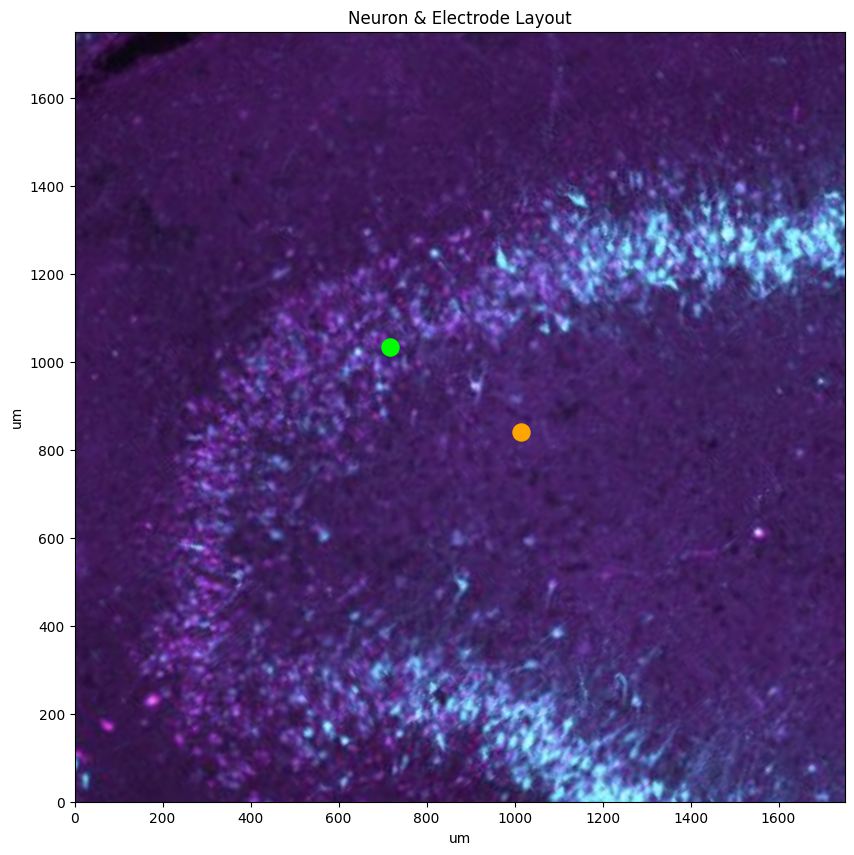

In [29]:
plt.figure(figsize=(15,10)) 
img = plt.imread("/workspaces/human_hippocampus/data/histology/hc112823.png")      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# #for num in [4,16, 3,5,16,29, 33,36,37,38, 44, 47, 58, 93, 94, 98]:
# data = sd.neuron_data[0][109]
# temp_chs=list(data["neighbor_channels"])
# xy =data["neighbor_positions"]
# templates=data["neighbor_templates"]
# for i in range(len(temp_chs)):
#     plt.plot(  np.arange(100)/5 +xy[i,0] , templates[i,:]*1.8 +xy[i,1], linewidth=1.8, color="orange"  )
    
data = sd.neuron_data[0][107]
plt.scatter(  data["position"][0] , data["position"][1], s=150, color="orange"  )


data = sd.neuron_data[0][135]
plt.scatter( data["position"][0] , data["position"][1], s=150, color="lime"  )


plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
plt.ylim( 0, 1750 )
#plt.xlim( 600, 1250 )                                       # Set axis limits to that of the MEA
#plt.ylim( 500, 1400 )

plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout") 

In [23]:
data = sd.neuron_data[0][107]

1015.0

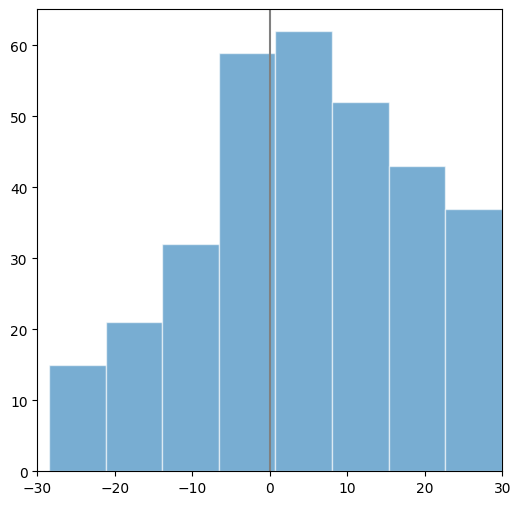

In [45]:
latencies_pair = latencies( 107, 135,sd, ms_cutoff_high=latency_ms  )

# Convert counts to percentages
#counts, bins = np.histogram(latencies_pair, bins=8)



# Plot the histogram with percentages
plt.figure(figsize=(6, 6))
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, color='b', edgecolor='black')
#percentages = counts / counts.sum() * 100
#plt.hist(bins[:-1], bins, weights=percentages, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')
plt.hist(latencies_pair, 8, alpha=0.6, edgecolor='white' ) #, color='b', edgecolor='black')

#plt.yticks([0, 10, 17.5])
plt.xlim(-30, 30)
# add red vertical line at 0, with opacity of 0.5
plt.axvline(0, color='grey', alpha=1, linewidth=1.5)
#plt.hist(latencies_pair, bins=12, alpha=0.6)

# From before

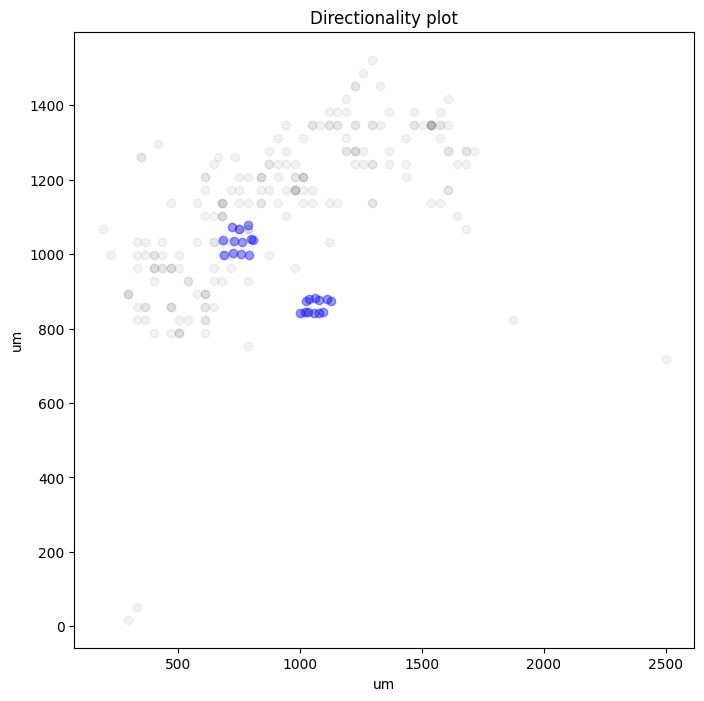

Number of Latencies 210
Mean Latency 1.505
Median Latency 2.125
STTC 0.20723049642599842
Diptest P-val 0.367
Latency Probability 0.82
.
Sender Neuron 107
Sender   Firing Rate 3.469
.
Receiver Neuron 135
Receiver Firing Rate 1.089


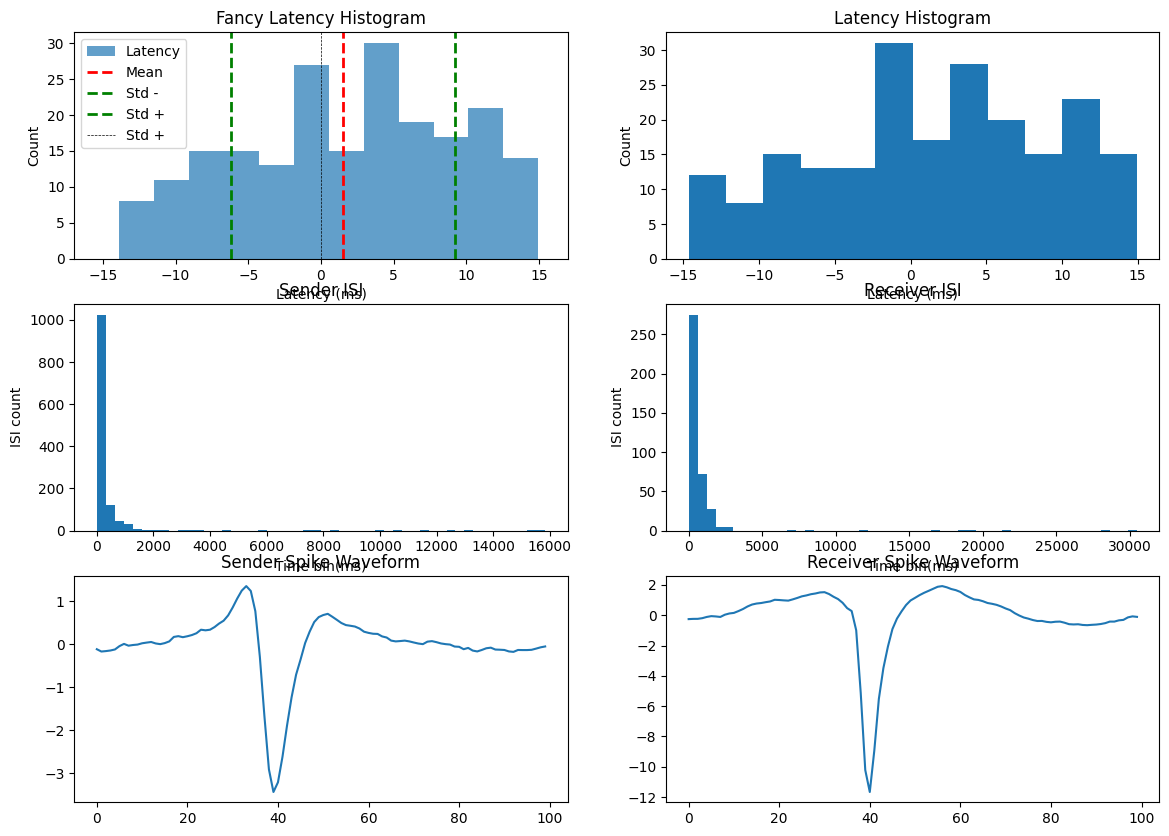

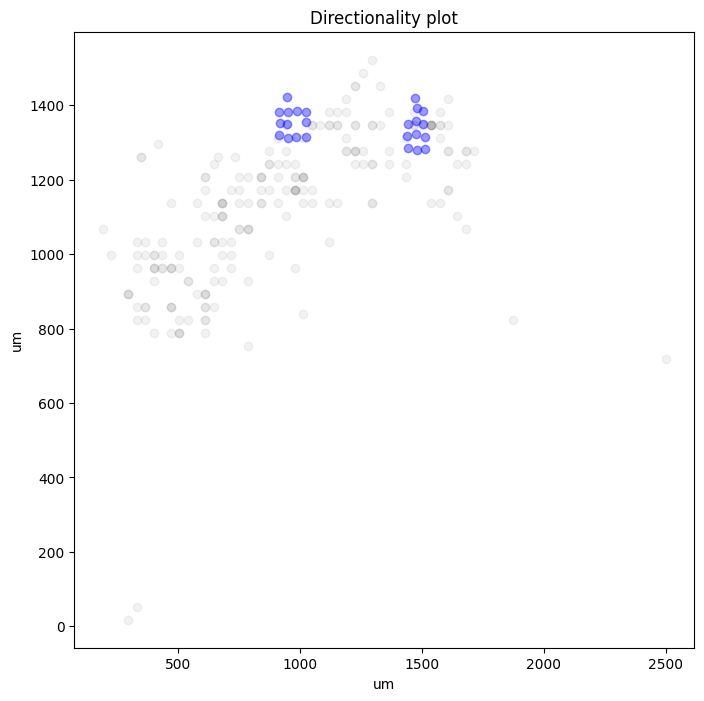

Number of Latencies 338
Mean Latency 1.917
Median Latency 3.4
STTC 0.5547833806662137
Diptest P-val 0.024
Latency Probability 0.83
.
Sender Neuron 147
Sender   Firing Rate 2.08
.
Receiver Neuron 90
Receiver Firing Rate 1.019


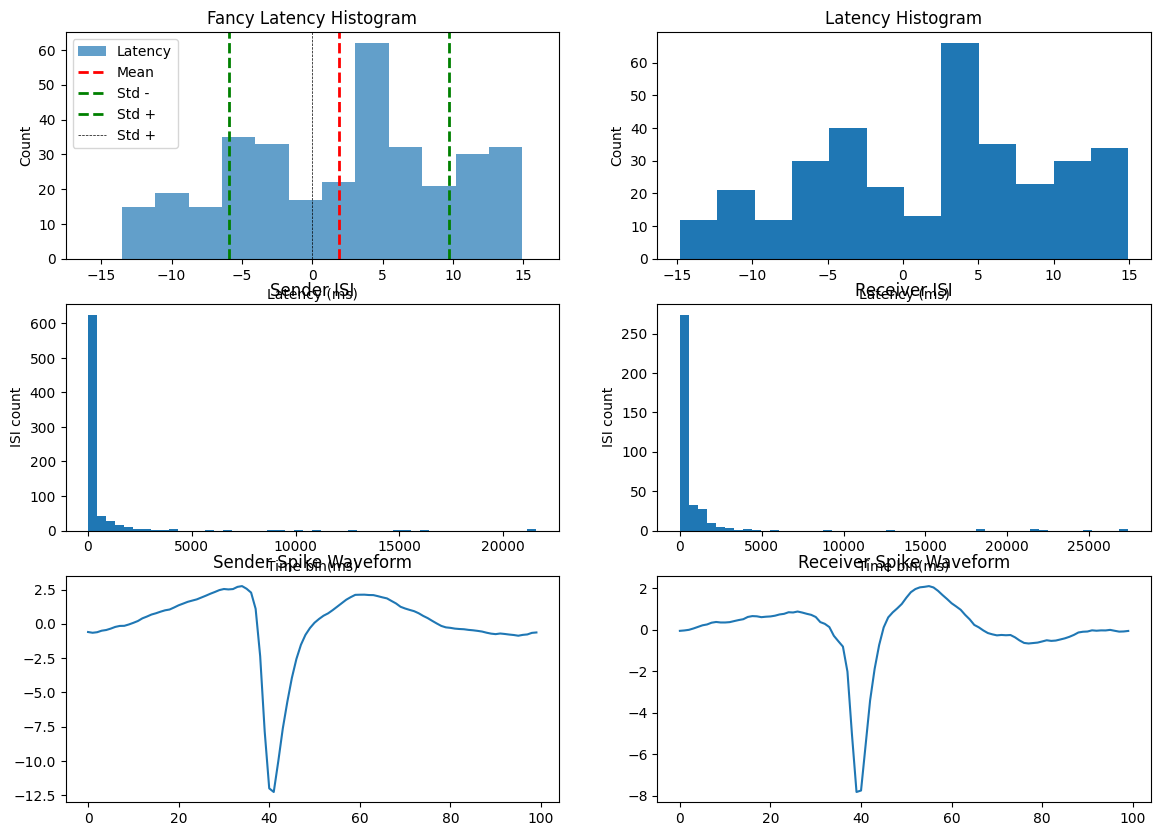

In [25]:
plot_pair_analysis(147,90, sd)

# Make spike Raster

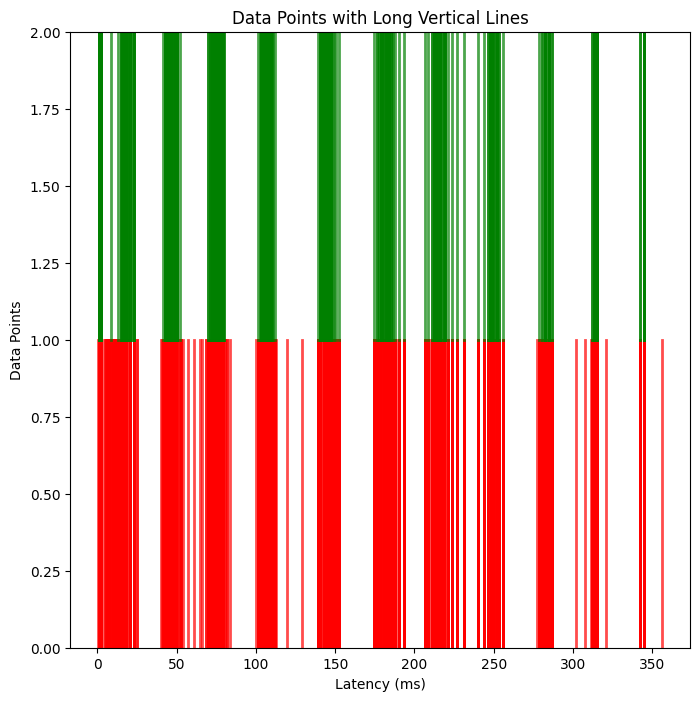

In [85]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x/1000, x/1000], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x/1000, x/1000], [1, 2], color='green', alpha=0.7, linewidth=2)

#plt.xlim(216, 216.5)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

# <font color="brown"> Try 3

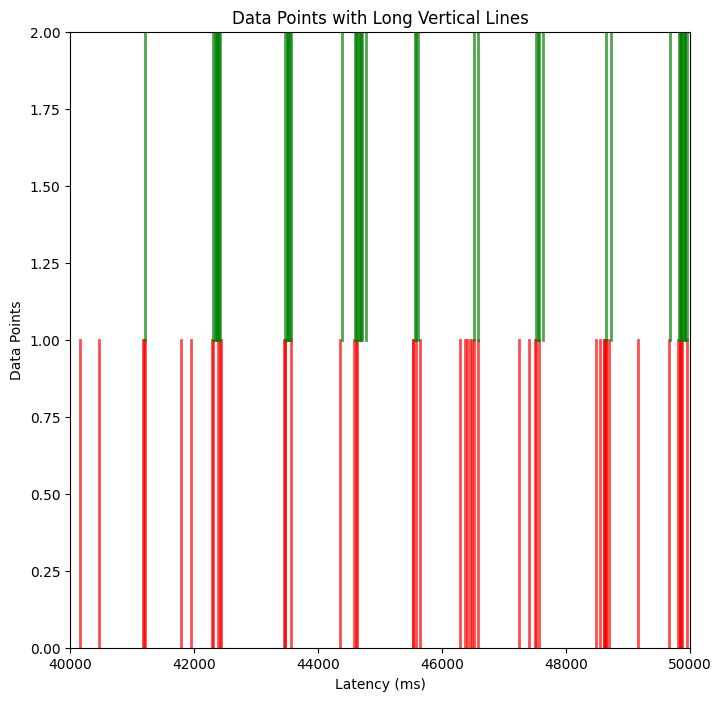

In [17]:
plt.figure(figsize=(8, 8))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [0, 1], color='red', alpha=0.7, linewidth=2)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [1, 2], color='green', alpha=0.7, linewidth=2)

plt.xlim(40000, 50000)
plt.ylim(0, 2)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

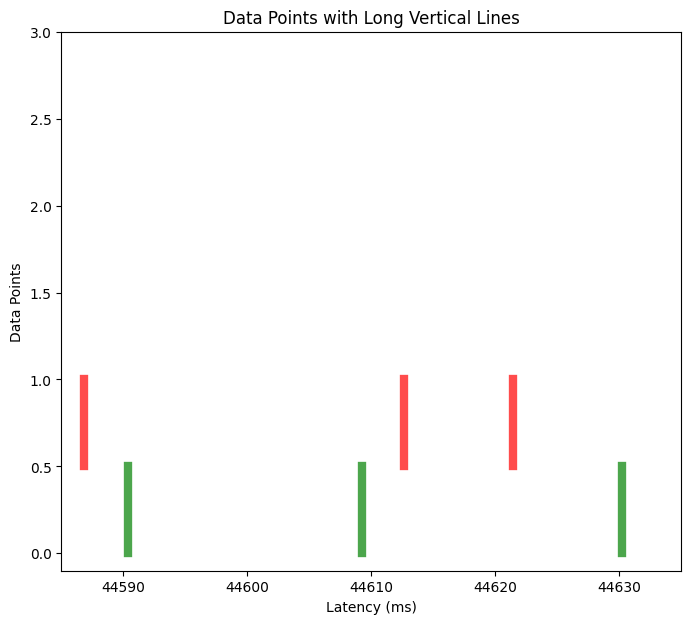

In [18]:
plt.figure(figsize=(8, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x, x], [.5, 1], color='red', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x, x], [0, .5], color='green', alpha=0.7, linewidth=6)

plt.xlim(44585, 44635)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()

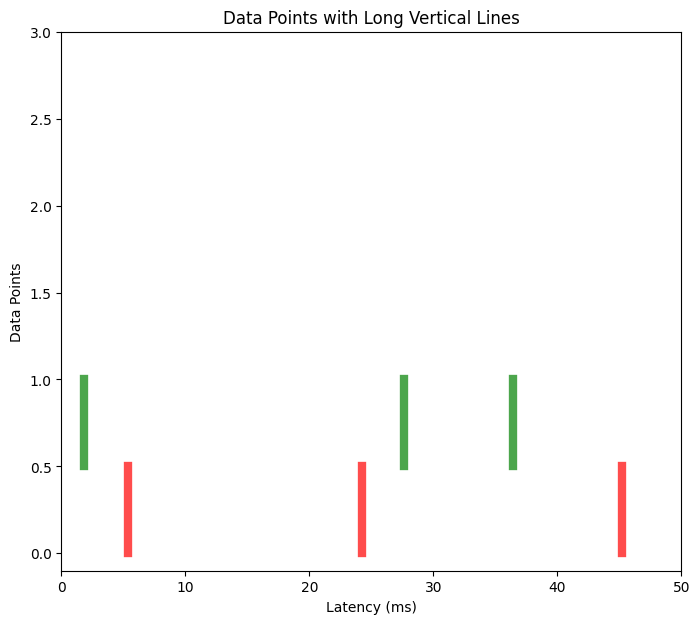

In [19]:
plt.figure(figsize=(8, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x-44585, x-44585], [.5, 1], color='green', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x-44585, x-44585], [0, .5], color='red', alpha=0.7, linewidth=6)

#plt.vlines([1.85,5.35,24.25,27.6,36.45,45.2], 0, 2, color='red', alpha=0.7)

plt.xlim(44585-44585, 44635-44585)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()





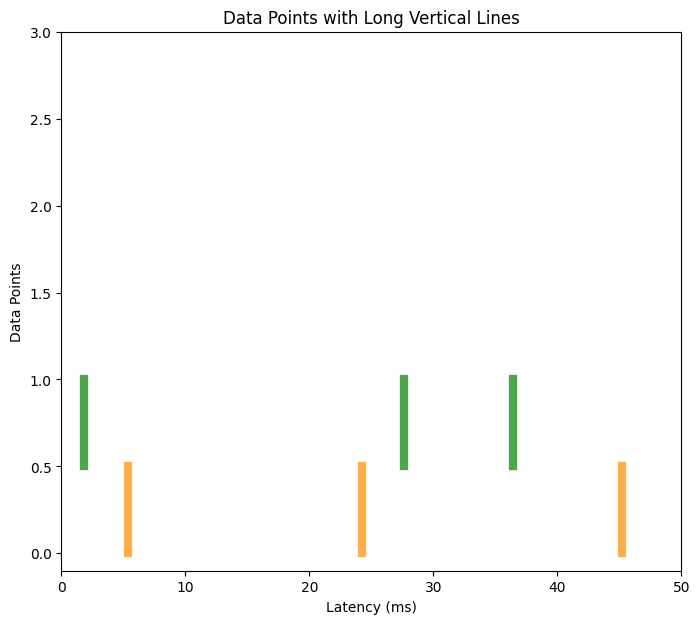

In [27]:
plt.figure(figsize=(8, 7))

# Create long vertical lines for data points in sd.train[147]
for x in sd.train[147]:
    plt.plot([x-44585, x-44585], [.5, 1], color='green', alpha=0.7, linewidth=6)

# Create long vertical lines for data points in sd.train[90]
for x in sd.train[90]:
    plt.plot([x-44585, x-44585], [0, .5], c="darkorange" , alpha=0.7, linewidth=6) #c="#ff9408"

#plt.vlines([1.85,5.35,24.25,27.6,36.45,45.2], 0, 2, color='red', alpha=0.7)

plt.xlim(44585-44585, 44635-44585)
plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
plt.xlabel('Latency (ms)')
plt.ylabel('Data Points')
plt.title('Data Points with Long Vertical Lines')
plt.show()


In [24]:
# plt.figure(figsize=(8, 7))

# # Create long vertical lines for data points in sd.train[147]
# for x in sd.train[147]:
#     plt.plot([x-44585, x-44585], [.5, 1], color='green', alpha=0.7, linewidth=6)

# # Create long vertical lines for data points in sd.train[90]
# for x in sd.train[90]:
#     plt.plot([x-44585, x-44585], [.25, .75], color='red', alpha=0.7, linewidth=6)

# #plt.vlines([1.85,5.35,24.25,27.6,36.45,45.2], 0, 2, color='red', alpha=0.7)

# plt.xlim(44585-44585, 44635-44585)
# plt.ylim(-.1, 3)  # Adjust the y-limits to ensure lines are visible
# plt.xlabel('Latency (ms)')
# plt.ylabel('Data Points')
# plt.title('Data Points with Long Vertical Lines')
# plt.show()


In [21]:
print("Latencies")
print(5.35-1.85)
print(24.25-27.6)
print(45.2-36.45)

Latencies
3.4999999999999996
-3.3500000000000014
8.75


In [22]:
for x in sd.train[147]:
    if x-44585<50 and x-44585>0:
        print(x-44585)
print("_____________")
for x in sd.train[90]:
    if x-44585<50 and x-44585>0:
        print(x-44585)

1.8499999999985448
27.599999999998545
36.450000000004366
_____________
5.349999999998545
24.25
45.200000000004366


In [181]:
44585/1000

44.585